# Optimization I
# Project 1 - Linear Programming
### Pranav Cheruku, Akshaya Mudar, Yingjia Shang, Rajshree Mishra

In [1]:
#import necessary libraries and packages
import gurobipy as gp 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# #1 Problem Statement
Assume that your company is deciding how to spend a marketing budget of $10M. You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums. Your department has employed an outside consulting firm to estimate the return on investment (ROI) of each marketing medium under consideration.

# #2 Constraints
On top of these ROIs, your boss has decided to constrain your budget as follows:  
    
    a. The amount invested in print and TV should be no more than the amount spent on Facebook and Email. Surprisingly, email seems to be a great channel for reaching real people.
    
    b. The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
    
    c. For each platform, the amount invested should be no more than $3M.

# #3
Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the
optimal budget allocation.

In [2]:
#import given csv file
df = pd.read_csv("ROI_data.csv")

In [3]:
# set up objective vector using the number in the first row of the csv file
obj = np.array([df.iloc[0,1],df.iloc[0,2],df.iloc[0,3],df.iloc[0,4], \
                df.iloc[0,5],df.iloc[0,6],df.iloc[0,7],df.iloc[0,8],df.iloc[0,9],df.iloc[0,10]])

# initialize constraint matrix
# create the left hand side of the constraints
A = np.zeros((13,10)) 
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,1,1,1,1,1,1,1,1,1] 
A[3,:] = [1,0,0,0,0,0,0,0,0,0]
A[4,:] = [0,1,0,0,0,0,0,0,0,0]
A[5,:] = [0,0,1,0,0,0,0,0,0,0]
A[6,:] = [0,0,0,1,0,0,0,0,0,0]
A[7,:] = [0,0,0,0,1,0,0,0,0,0]
A[8,:] = [0,0,0,0,0,1,0,0,0,0]
A[9,:] = [0,0,0,0,0,0,1,0,0,0]
A[10,:] = [0,0,0,0,0,0,0,1,0,0]
A[11,:] = [0,0,0,0,0,0,0,0,1,0]
A[12,:] = [0,0,0,0,0,0,0,0,0,1]

# create the right hand side of the constraints
b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3])

# specify the direction of operator for each constraint
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) 

In [4]:
print("Left hand side of constraints = ")
print(A)

print("Right hand side of constraints = ")
print(b)

Left hand side of constraints = 
[[ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Right hand side of constraints = 
[ 0  0 10  3  3  3  3  3  3  3  3  3  3]


In [5]:
# initialize an empty model
ojModel = gp.Model() 

# tell the model how many variables there are、adding model variables
ojModX = ojModel.addMVar(10) 
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.Params.TimeLimit = 3600

ojModel.optimize() # solve the LP

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-17


In [6]:
# Following the optimized marketing budget allocation, we get the optimal ROI
ojModel.objVal 
print('The optimal ROI value is ' + str(ojModel.objVal) + ' in millions of dollars')

The optimal ROI value is 0.45600000000000007 in millions of dollars


In [7]:
# Marketing budget allocation for each media in millions of dollars
ojModX.x 

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

In [8]:
# create a dictionary to store all the marketing channels given
marketing = list(df.columns)[1:] 
marketing_dict = {}
i = 0
for word in marketing:
    marketing_dict[word] = i
    i = i + 1

In [9]:
# update the dictionary with the optimal budget calculated by Gurobi
opt_budget = list(ojModel.x)
opt_budget_dict = {}
i = 0
for each in marketing:
    opt_budget_dict[each] = opt_budget[i]
    i = i + 1

In [10]:
print("Optimal marketing budget allocation for each media in millions of dollars")
print(pd.Series(opt_budget_dict).sort_values(ascending=False))

Optimal marketing budget allocation for each media in millions of dollars
TV           3.0
Instagram    3.0
Email        3.0
AdWords      1.0
Print        0.0
SEO          0.0
Facebook     0.0
LinkedIn     0.0
Snapchat     0.0
Twitter      0.0
dtype: float64


<AxesSubplot:>

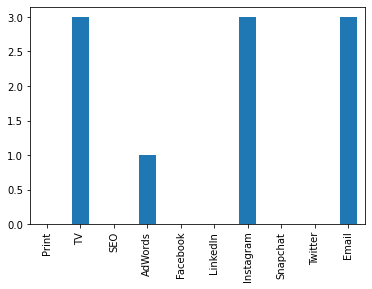

In [11]:
#plot the budget allocation
pd.Series(opt_budget_dict).plot(kind = 'bar')

In [12]:
#store the optimal values in a new variable
alloc_1 = ojModX.x

# #4
Revise ROI data and compare the results with Q3

In [13]:
# set up objective vector using the number in the second row of the csv file
obj2 = np.array([df.iloc[1,1],df.iloc[1,2],df.iloc[1,3],df.iloc[1,4], \
                df.iloc[1,5],df.iloc[1,6],df.iloc[1,7],df.iloc[1,8],df.iloc[1,9],df.iloc[1,10]]) 

# initialize constraint matrix
# create the left hand side of the constraints
A = np.zeros((13,10)) 
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,1,1,1,1,1,1,1,1,1] 
A[3,:] = [1,0,0,0,0,0,0,0,0,0]
A[4,:] = [0,1,0,0,0,0,0,0,0,0]
A[5,:] = [0,0,1,0,0,0,0,0,0,0]
A[6,:] = [0,0,0,1,0,0,0,0,0,0]
A[7,:] = [0,0,0,0,1,0,0,0,0,0]
A[8,:] = [0,0,0,0,0,1,0,0,0,0]
A[9,:] = [0,0,0,0,0,0,1,0,0,0]
A[10,:] = [0,0,0,0,0,0,0,1,0,0]
A[11,:] = [0,0,0,0,0,0,0,0,1,0]
A[12,:] = [0,0,0,0,0,0,0,0,0,1]

# create the right hand side of the constraints
b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3]) 

# specify the direction of operator for each constraint
sense = np.array(['<','>','<','<','<','<','<','<','<','<','<','<','<']) 

In [14]:
print("Left hand side of constraints = ")
print(A)

print("Right hand side of constraints = ")
print(b)

Left hand side of constraints = 
[[ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Right hand side of constraints = 
[ 0  0 10  3  3  3  3  3  3  3  3  3  3]


In [15]:
# initialize an empty model
ojModel2 = gp.Model() 

# tell the model how many variables there are、adding model variables
ojModX2 = ojModel2.addMVar(10) 
# must define the variables before adding constraints because variables go into the constraints
ojModCon2 = ojModel2.addMConstrs(A, ojModX2, sense, b) # add the constraints to the model
ojModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel2.Params.TimeLimit = 3600

ojModel2.optimize() # solve the LP

In [16]:
# Following the optimized marketing budget allocation, we get the optimal ROI
ojModel2.objVal
print('The optimal ROI value is ' + str(ojModel2.objVal) + ' in millions of dollars')

The optimal ROI value is 0.45600000000000007 in millions of dollars


In [17]:
# Marketing budget allocation for each media in millions of dollars
ojModX2.x 

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

In [18]:
# update the dictionary with the revised optimal budget calculated by Gurobi
opt_budget2 = list(ojModel2.x)
opt_budget_dict2 = {}
i = 0
for each in marketing:
    opt_budget_dict2[each] = opt_budget2[i]
    i = i + 1

In [19]:
print("Revised optimal marketing budget allocation for each media in millions of dollars")
print(pd.Series(opt_budget_dict2).sort_values(ascending=False))

Revised optimal marketing budget allocation for each media in millions of dollars
Print        3.0
Facebook     3.0
LinkedIn     3.0
AdWords      1.0
TV           0.0
SEO          0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64


<AxesSubplot:>

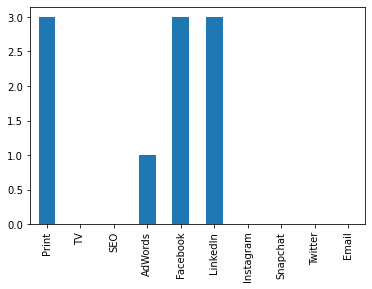

In [20]:
#plot the budget allocation
pd.Series(opt_budget_dict2).plot(kind = 'bar')

In [21]:
#store the optimal values in a new variable
alloc_2 = ojModX2.x 

# #5
Are the allocations the same? Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)? Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective? Do you think the third constraint above, based on your boss’ experience, is useful?

In [22]:
#Assuming the first ROI data is correct, using the second allocation
M=np.matmul(alloc_2,obj)

In [23]:
M

0.252

In [24]:
ojModel2.objVal - M

0.20400000000000007

In [51]:
print('Assuming the first ROI data is correct, using the second allocation, it would be ' + str((ojModel2.objVal - M).round(3)) + \
      " less than the actual objective in millions of dollars")

Assuming the first ROI data is correct, using the second allocation, it would be 0.204 less than the actual objective in millions of dollars


In [25]:
#Assuming the second ROI data is correct, using the first allocation
M2=np.matmul(alloc_1,obj2)

In [26]:
M2

0.264

In [27]:
ojModel.objVal - M2

0.19200000000000006

In [52]:
print('Assuming the second ROI data is correct, using the first allocation, it would be ' + str((ojModel.objVal - M2).round(3)) + \
      " less than the actual objective in millions of dollars")

Assuming the second ROI data is correct, using the first allocation, it would be 0.192 less than the actual objective in millions of dollars


In [28]:
# Testing the third constraint
# Remove the third constraint in the linear program
# set up objective vector using the number in the first row of the csv file
obj3 = np.array([df.iloc[0,1],df.iloc[0,2],df.iloc[0,3],df.iloc[0,4], \
                df.iloc[0,5],df.iloc[0,6],df.iloc[0,7],df.iloc[0,8],df.iloc[0,9],df.iloc[0,10]]) 

# initialize constraint matrix
# create the left hand side of the constraints
A = np.zeros((3,10)) 
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,1,1,1,1,1,1,1,1,1] 

# create the right hand side of the constraints
b = np.array([0,0,10]) 

# specify the direction of operator for each constraint
sense = np.array(['<','>','<']) 

In [29]:
# initialize an empty model
ojModel3 = gp.Model() 

# tell the model how many variables there are、adding model variables
ojModX3 = ojModel3.addMVar(10) 
# must define the variables before adding constraints because variables go into the constraints
ojModCon3 = ojModel3.addMConstrs(A, ojModX3, sense, b) # add the constraints to the model
ojModel3.setMObjective(None,obj3,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel3.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel3.Params.TimeLimit = 3600

ojModel3.optimize() # solve the LP

In [30]:
# Marketing budget allocation for each media in millions of dollars
ojModX3.x 

array([0., 5., 0., 0., 0., 0., 0., 0., 0., 5.])

In [31]:
# Following the optimized marketing budget allocation, we get the optimal ROI
ojModel3.objVal
print('The optimal ROI value is ' + str(ojModel3.objVal) + ' in millions of dollars')

The optimal ROI value is 0.46499999999999997 in millions of dollars


In [32]:
# Testing the third constraint
# Remove the third constraint in the linear program
# set up objective vector using the number in the second row of the csv file
obj4 = np.array([df.iloc[1,1],df.iloc[1,2],df.iloc[1,3],df.iloc[1,4], \
                df.iloc[1,5],df.iloc[1,6],df.iloc[1,7],df.iloc[1,8],df.iloc[1,9],df.iloc[1,10]]) 

# initialize constraint matrix
# create the left hand side of the constraints
A = np.zeros((3,10)) 
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[1,:] = [0,0,-2,-2,1,1,1,1,1,0] 
A[2,:] = [1,1,1,1,1,1,1,1,1,1] 

# create the right hand side of the constraints
b = np.array([0,0,10]) 

# specify the direction of operator for each constraint
sense = np.array(['<','>','<']) 

In [33]:
# initialize an empty model
ojModel4 = gp.Model() 

# tell the model how many variables there are、adding model variables
ojModX4 = ojModel4.addMVar(10) 
# must define the variables before adding constraints because variables go into the constraints
ojModCon4 = ojModel4.addMConstrs(A, ojModX4, sense, b) # add the constraints to the model
ojModel4.setMObjective(None,obj4,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

ojModel4.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel4.Params.TimeLimit = 3600

ojModel4.optimize() # solve the LP

In [34]:
# Marketing budget allocation for each media in millions of dollars
ojModX4.x 

array([5., 0., 0., 0., 5., 0., 0., 0., 0., 0.])

In [35]:
# Following the optimized marketing budget allocation, we get the optimal ROI
ojModel4.objVal
print('The optimal ROI value is ' + str(ojModel4.objVal) + ' in millions of dollars')

The optimal ROI value is 0.46499999999999997 in millions of dollars


For the first ROI dataset, we would invest 5 million dollars each in TV and Email.For the second ROI dataset, we would invest 5 million dollars each in Print and Facebook. Additionally, there is an increase in the ROI from 0.456 million dollars to 0.465 million dollars.
Removing the constraint would result in a higher ROI; however, our budget will mainly focus on the two medium that generate the highest returns. This would cause the risk in investment to increase. We think that adding the third constraint would be reasonable since it diversifies the investment and mitigate the risks.

# #6
To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [36]:
# Sensitivity Analysis: calculate the shadow price for each constraint
print([con.Pi for con in ojModCon])

[0.010000000000000002, 0.0, 0.039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006999999999999999, 0.0, 0.0, 0.015]


From the result, we observed that the 1st, 3rd, 10th, and 13th equations are non-zero. Thus, these functions are binding constraints. The other functions with a value of zero would be our non-binding constraints. The shadow prices tell us the change that our revenue will have on each unit change in the ROI, within the applicable range where the constraint is non-binding. 
For instance, an increase of 1 million dollars of total investment in SEO would give the company a 0.039M excess return. 

In [37]:
#calculate the lower bound for the budget allocation of each media
ojModX.SAObjLow

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [38]:
#calculate the upper bound for the budget allocation of each media
ojModX.SAObjUp

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

In [39]:
lower_bound = ojModX.SAObjLow
upper_bound = ojModX.SAObjUp

In [40]:
medium = list(marketing_dict)

In [41]:
df.iloc[[0]]

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044


In [42]:
pd.DataFrame({'medium':medium,'min_ROI':lower_bound,'max_ROI':upper_bound}).set_index('medium')

,min_ROI,max_ROI
medium,,
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
AdWords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039


We calculated how much could each advertising medium’s ROI change and still result in the same optimal allocation.

For example:

Print: The ROI for Print can increase up by .018 and still result in the same optimal allocation. It can decrease down by any degree and still result in the same optimal allocation.

TV: The ROI for TV can increase up by .013 and still result in the same optimal allocation. It can decrease down by .010 and still result in the same optimal allocation.

SEO: The ROI for SEO can increase up by .015 and still result in the same optimal allocation. It can decrease down by any degree and still result in the same optimal allocation. 

AdWords: The ROI for Adwords can increase by .007 and still result in the same optimal allocation. It can decrease down by .006 and still result in the same optimal allocation.

# #7
Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?

In [46]:
Index_data = pd.read_csv('index_data.csv') #import given csv file
output_df_5=Index_data.set_index('Unnamed: 0') #set index
roi_mat = pd.read_csv('roi_mat.csv') #import given csv file
roi_list=roi_mat.set_index('Unnamed: 0') #set index
roi_list=roi_list/100 #to get the previous rounding of digits
month_list=Index_data['Unnamed: 0'] #set index
month_list
results = pd.DataFrame(columns = ['month','optimal_outcome','new_budget_next_month'])      


budget=10000000
for month in month_list:
    obj = roi_list.loc[month]
    #metrics of multipliers
    A = np.array([[1,1,1,1,1,1,1,1,1,1],[1,1,0,0,-1,0,0,0,0,-1],[0,0,-2,-2,1,1,1,1,1,0],[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1]])
    b = np.array([budget,0,0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000]) # limits 
    #add the directions for each constraint
    sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<']) 
    ojModel3 = gp.Model() # initialize an empty model
    ojMod_x3 = ojModel3.addMVar(10) # tell the model how many variables there are
    ojMod_con3 = ojModel3.addMConstrs(A, ojMod_x3, sense, b) # NAME THE CONSTRAINTS!!! so we can get information about them later!
    ojModel3.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    ojModel3.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ojModel3.optimize() # solve the LP
    ojModel3.Objval
    output_df_5.loc[month]=ojMod_x3.x #storing allocation for each month
    budget=10000000+ojModel3.Objval*0.5
    results.loc[len(results)] = [month,ojModel3.Objval,budget]

# The optimal allocation in each month as well as the new budget for next month are shown in the following table:
output_df_5
output_df_5.join(results.set_index('month')).round(2)

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,optimal_outcome,new_budget_next_month
Unnamed: 0,,,,,,,,,,,,
January,3000000.00,0.00,0,1333333.33,0.00,0,2666666.67,0,0.00,3000000.00,373000.00,10186500.00
February,3000000.00,0.00,0,2395500.00,3000000.00,0,0.00,0,1791000.00,0.00,406296.00,10203148.00
March,0.00,0.00,0,3000000.00,0.00,3000000,1203148.00,0,3000000.00,0.00,407516.48,10203758.24
April,0.00,0.00,0,3000000.00,0.00,3000000,3000000.00,0,1203758.24,0.00,400335.30,10200167.65
May,1200167.65,0.00,0,0.00,0.00,0,3000000.00,0,3000000.00,3000000.00,411005.87,10205502.93
June,3000000.00,0.00,0,0.00,0.00,0,3000000.00,0,1205502.93,3000000.00,423809.11,10211904.56
July,0.00,0.00,0,3000000.00,1211904.56,0,3000000.00,0,3000000.00,0.00,428264.28,10214132.14
August,2714132.14,0.00,0,1500000.00,0.00,0,0.00,0,3000000.00,3000000.00,437993.55,10218996.77
September,609498.39,0.00,0,3000000.00,0.00,3000000,0.00,0,3000000.00,609498.39,402712.38,10201356.19


# #8
A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?

In [45]:
# Calculated the change in monthly allocation for each platform
output_df_5.diff().round(2)

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Unnamed: 0,,,,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,0.00,0.00,0.0,1062166.67,3000000.00,0.0,-2666666.67,0.0,1791000.00,-3000000.00
March,-3000000.00,0.00,0.0,604500.00,-3000000.00,3000000.0,1203148.00,0.0,1209000.00,0.00
April,0.00,0.00,0.0,0.00,0.00,0.0,1796852.00,0.0,-1796241.76,0.00
May,1200167.65,0.00,0.0,-3000000.00,0.00,-3000000.0,0.00,0.0,1796241.76,3000000.00
June,1799832.35,0.00,0.0,0.00,0.00,0.0,0.00,0.0,-1794497.07,0.00
July,-3000000.00,0.00,0.0,3000000.00,1211904.56,0.0,0.00,0.0,1794497.07,-3000000.00
August,2714132.14,0.00,0.0,-1500000.00,-1211904.56,0.0,-3000000.00,0.0,0.00,3000000.00
September,-2104633.75,0.00,0.0,1500000.00,0.00,3000000.0,0.00,0.0,0.00,-2390501.61


As we can see, for some months the difference in spending is more than one million dollars, which implies that our model is not stable and we do not need to solve for a new optimization model. One way to model stability is define a stability constraint that restricts change in spending from month to month to at most one million dollars.
